# **Import libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# **Load the dataset**

In [30]:
df = pd.read_csv("Mall_Customers.csv")
print("Initial dataset shape:", df.shape)
df.head()

Initial dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Check for missing values**

In [31]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# **Preprocessing**

In [32]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
features = ['Gender', 'Age', 'Income', 'SpendingScore']
X = df[features]

## **Scaling**

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **PCA**

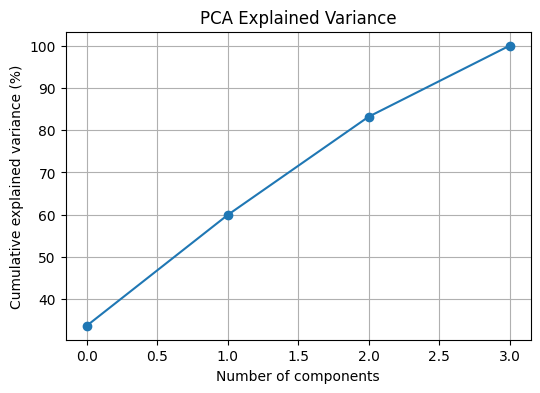

Original dim: 4 Reduced dim (95% var): 4


In [34]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance (%)")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("Original dim:", X_scaled.shape[1], "Reduced dim (95% var):", X_pca_95.shape[1])

# **t-SNE**

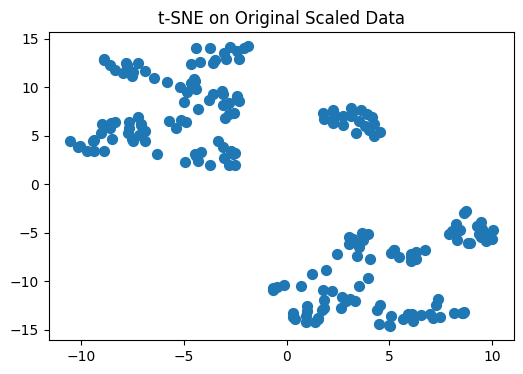

In [42]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

#t-SNE visualization

plt.figure(figsize=(6,4))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=50)
plt.title("t-SNE on Original Scaled Data")
plt.show()

# **KMeans clustering**

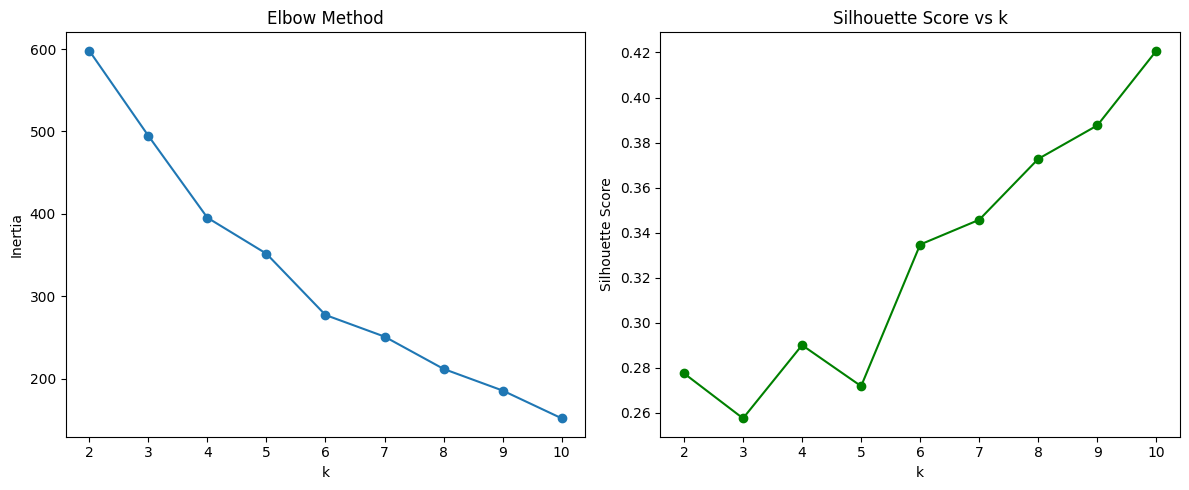

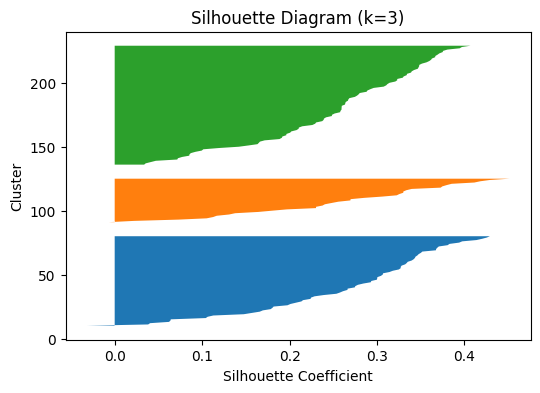

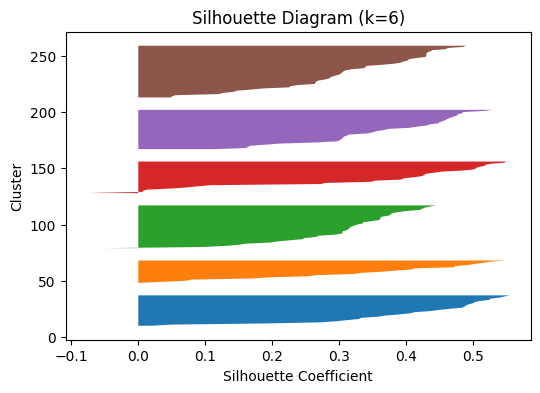

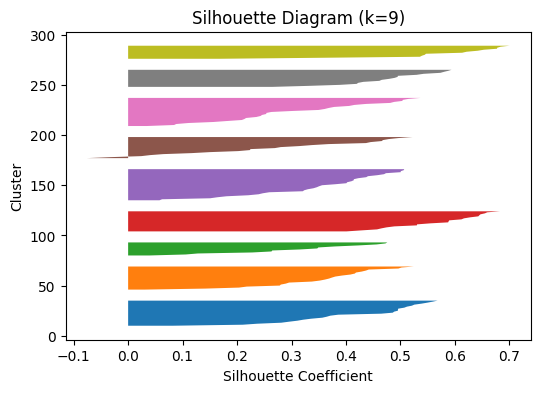

In [41]:
inertia = []
sil_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

# Plot Elbow and Silhouette Score
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# Silhouette diagram for k = 3, 5, 8
for k_val in [3, 6, 9]:
    km = KMeans(n_clusters=k_val, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_samples = silhouette_samples(X_scaled, labels)

    plt.figure(figsize=(6,4))
    y_lower = 10
    for i in range(k_val):
        ith_cluster_sil_values = sil_samples[labels == i]
        ith_cluster_sil_values.sort()
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values)
        y_lower = y_upper + 10
    plt.title(f"Silhouette Diagram (k={k_val})")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.show()